# Project: Exploration of Fifty-Five Years of Cinema

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This is an analytical report of a movie dataset taken from Kaggle based on an edited imdb list. There's around ten thousand movies from the mid 60s till the year 2015. The data includes information like movies budget, genres and popularity.

> Most of the questions I'm invistigating here is related to how much have the film production industry changed, both in terms of quantity and budget.
> Also I'm looking for most popular directors, genres, movies and cast.

In [1]:
# Importing all the necessary packages and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> Next, I will be looking into data viability. This is an evaluation of whether or not all available data is needed for the purposes of my analysis, as well as cleaning all missing, duplicate or otherwise any odd data.

### General Properties

In [2]:
# Loading the dataset
df = pd.read_csv('tmdb-movies.csv')

# printing out a few lines to check for succefulness and view column labels

In [163]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [164]:
#  Viewing data types and shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**Six out of twenty-one columns include missing values,** each of which will be dealt with right after irrelevant data columns are removed.<br>But first, let's also check for zero values.

In [165]:
df.astype(bool).sum(axis=0)

id                      10866
imdb_id                 10866
popularity              10866
budget                   5170
revenue                  4850
original_title          10866
cast                    10866
homepage                10866
director                10866
tagline                 10866
keywords                10866
overview                10866
runtime                 10835
genres                  10866
production_companies    10866
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj               5170
revenue_adj              4850
dtype: int64

Around half the number of data is missing for both kinds of budget and revenue<br>columns. This means that simply dropping zero values is not a valid opthion for<br>our dataset.
There's also a few missing values in the runtime column.

I will deal with both zero and null values right after the unwanted columns are succeffuly dropped.

### Here's what's being excluded and why: 

In [3]:
# Removing unwanted column labels
labels = ['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'overview', 'tagline', 'keywords']
df.drop(columns=labels, inplace=True)

- Budget and revenue are removed since the other versions available here do account<br>"for inflation over time" as stated in the notes in the google document provided by Udacity.
- The two IDs, homepage, tagline and keywords aren't relevant to any of our questions.

Now heading for nulls and zeros, production companies have a total of 10,030 missing values. Given how much the overall data can be affected if the null values are simply removed; they're to be kept.

In [4]:
# Replacing Nan values with a string
df['production_companies'].fillna('Missing data', inplace=True)

In [5]:
# Checking for succesfulness
df['production_companies'].isnull().sum()

0

Now rows with null values can be safely removed without risking a dramatic reduction of the data.

In [6]:
# Dropping null values
df.dropna(inplace=True)
# Dropping duplicate values
df.drop_duplicates(inplace=True)

In [7]:
# Checking for success
print(df.isnull().sum().sum())
print(df.duplicated().sum().sum())

0
0


<a id='eda'></a>
## Exploratory Data Analysis

### Who are the most prolific directors, actors/ actresses, production companies?

First off, let's look into who are the top twenty directors in terms of film-production over the years.

In [8]:
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [7]:
# Defining a function to split columns with multiple data
split = lambda x: x.split("|")[0]

In [13]:
# creating a list of the columns to be split
separate = ['cast', 'director', 'genres']
# updating the dataframe to have new split values
for i in separate:
    df.update(df[i].apply(lambda x: x.split('|')[0]))

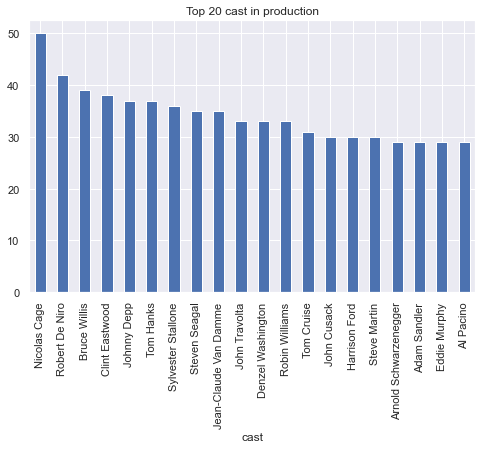

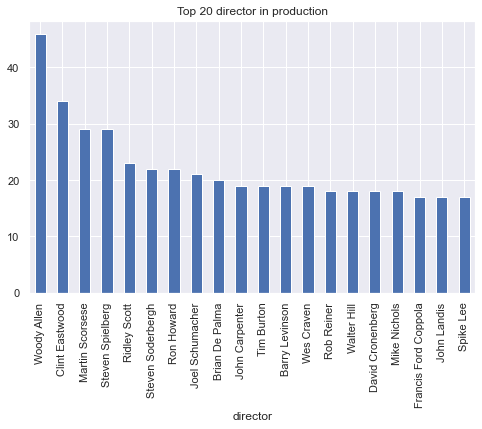

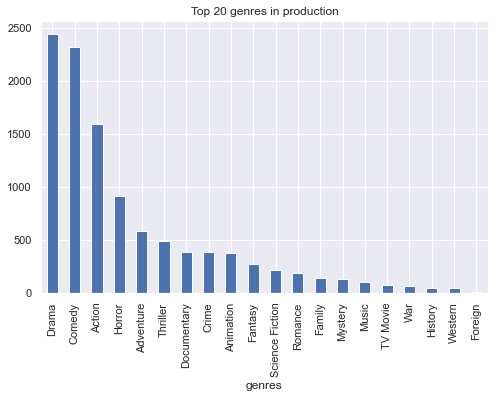

In [14]:
# Finding top directors, cast, genres, and how many times each one is recorded
sns.set(rc={'figure.figsize':(8,5)})

for i in separate:
    data=df.groupby(i)[i].count()
    data.sort_values(ascending=False,inplace=True)
    data[:20].plot(kind="bar")
    plt.title("Top 20 {} in production".format(i))
    
    plt.show()

> As represented above, forty-five of the movies we have are directed by Woody Allen alone!<br>
> The rest of top five directors are Clint Eastwood, Martin Scorsese, Steven Spielberg and Ridley Scott.<br>
> And there we have it, a list of the most 20 prolific directors of, well, all years!

#### Now for the second part: Famous actors/ actresses, who made the most appearances on screen? 

> Nicolas Cage (50 movies), De Niro, Bruce Willis... and all the way to our 20th top actor in terms of appearances on films, Arnold Shwarzenegger.

> We can also see that, not only does Clint Eastwood make it to our top productive directors list, but here he is again, with a number of movies approximating forty.

#### Finally, genres:
> the most produced in the list are drama, comedy, action and horror, and the least produced is forign movies

### Now, we're looking into top production companies behind all of it:

In [19]:
# Separating companies
df['production_companies'].apply(split)

0                Universal Studios
1        Village Roadshow Pictures
2             Summit Entertainment
3                        Lucasfilm
4               Universal Pictures
                   ...            
10861            Bruce Brown Films
10862         Cherokee Productions
10863                      Mosfilm
10864      Benedict Pictures Corp.
10865                    Norm-Iris
Name: production_companies, Length: 10731, dtype: object

In [20]:
# Now it's time we found our real production companies number, not accounting for the missing values 
companies = df['production_companies'].replace('Missing data', None)

In [21]:
# Getting top 20 and how many each of their names is recorded in the data
co = companies.value_counts().head(20)
# Getting cast name and count of appearance times into a dictionary
values = co.keys().tolist()
counts = co.tolist()
production_co = dict(zip(values, counts))

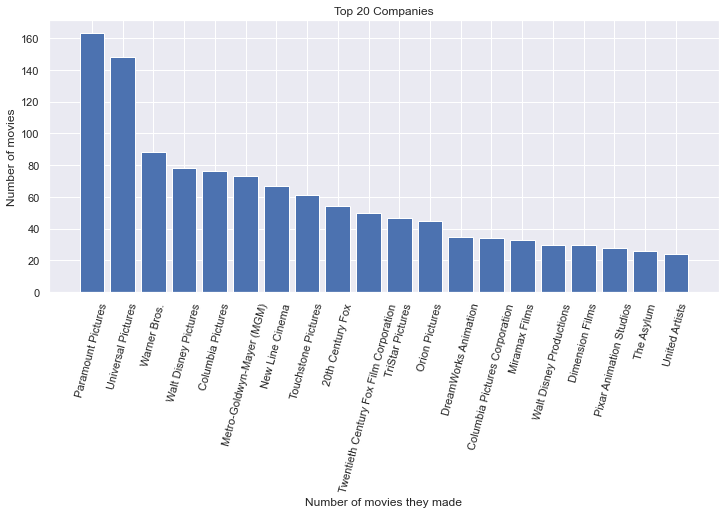

In [23]:
# Making a bar chart out of the dictionary
companies = list(production_co.keys())
production = list(production_co.values())

plt.bar(range(len(production_co)), production, tick_label=companies)
plt.title('Top 20 Companies')
plt.xlabel('Number of movies they made')
plt.ylabel('Number of movies')
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (12,5)
plt.show()

> As shown above, we have a representation of the top 20 companies to get there names out in the movie theatres.

### Research Question 2: How much did film industry change over the years?

In [93]:
movies_per_year = df.groupby('release_year', as_index=False)['original_title'].count()

In [94]:
years = movies_per_year['release_year'].tolist()
movies_count = movies_per_year['original_title'].tolist()

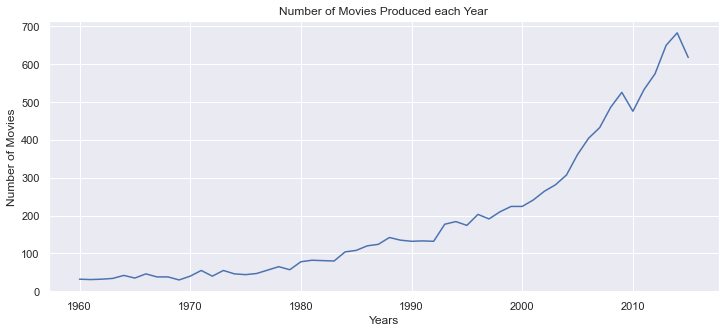

In [95]:
plt.style.use('seaborn-deep')

plt.plot(years, movies_count)
plt.title('Number of Movies Produced each Year')
plt.xlabel('Years')
plt.ylabel('Number of Movies')
plt.rcParams['figure.figsize'] = (12,5)
plt.grid(True)

plt.show()

- We can see that movies production from the 60s till late in the 70s has barely increasd
- from early in the 80s till 2000 there's a gradual increase
- And a significant accelaration since the beginning of the twenty-first century till 2015
- Except for a period of a production drop, around 2008-2010

### Whar are the most succesful movies in terms of popularity?

In [344]:
twenty_list = df['popularity'].nlargest(20)
twenty_list = pd.DataFrame(twenty_list)

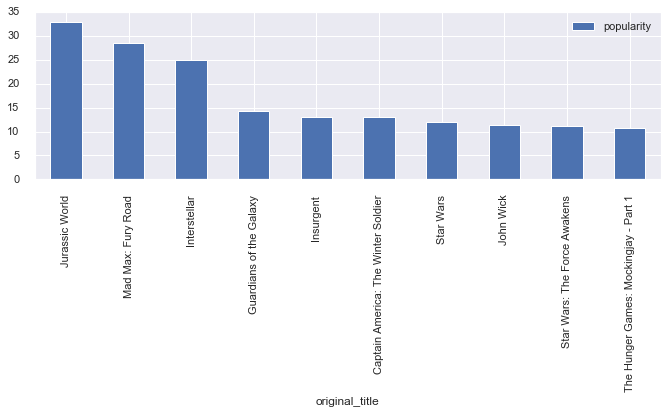

In [359]:
# Finding 20 largest popularity ratings
movies_popularity = df.groupby(['original_title'])['popularity'].mean()
movies_popularity = pd.DataFrame(movies_popularity)
movies_popularity.nlargest(10,movies_popularity).plot(kind='bar');

This was a list of top twenty films in terms of popularity, ranked from top to bottom

### What are the most and least popular genres?

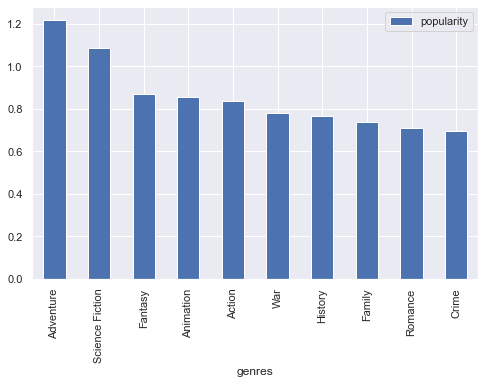

In [18]:
genres_popularity = df.groupby(['genres'])['popularity'].mean()
genres_popularity = pd.DataFrame(genres_popularity)
genres_popularity.nlargest(10,genres_popularity).plot(kind='bar');

> From adventure to crime movies: here's the order of genres ranked from most to least popular

### What are the most costly movie genres in terms of production?

In [375]:
# separating genres
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

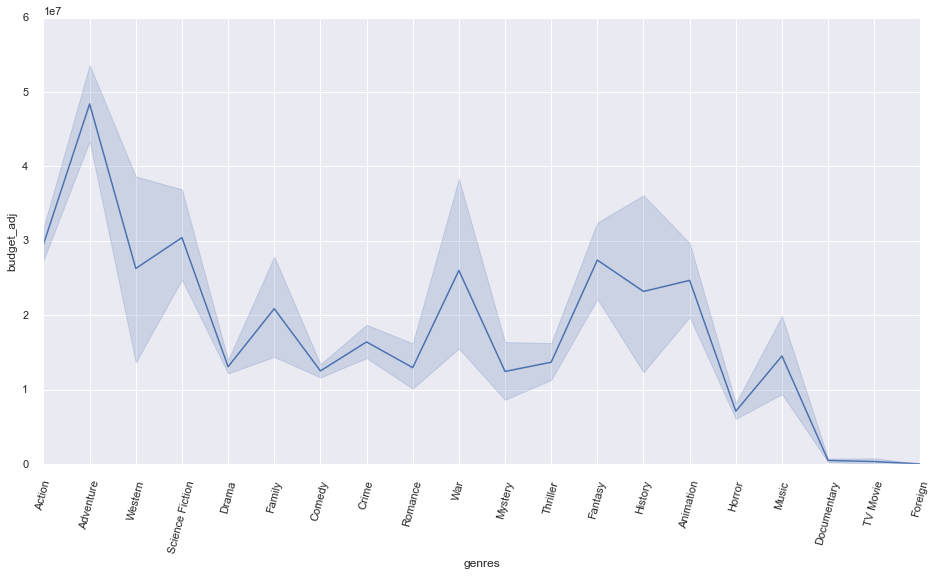

In [376]:
# looking into genres representation with their average cost
sns.set(rc={'figure.figsize':(14,8)})
ax=sns.lineplot(data=df,x='genres',y='budget_adj')
plt.xticks(rotation=75);

- highest budget: adventure
- science fiction and action
- then comes fantasy, and close to it western films
- next is war, animation, family, music, thriller
- (mystery, romance, comedy, drama)
- horro
- documentary, tv movies, foreign

<a id='conclusions'></a>
## Conclusions

> We found some interesting information especially about popularity as well as the cost of different genres production.
> However, it's noteworthy that our conclusions are tentative and based solely on the list of semi-random data we have here.
> The facts we have found is interesting and gives us a good image of films from the 60s till 2015, yet it's not accurate or completely reliable to draw definite conclusions.